# Лабораторна робота 1

**Мета:** отримати базові навики використання Python для дослідження та візуалізації даних.

## Номер варіанту


In [3]:
N = ord("M") % 3 + 1
print(N)

3


## Завдання 1 
### Функція

In [5]:
import csv
import numpy as np


def get_column_values(filename, column_name):
    with open(filename, 'r') as f:
        reader = csv.DictReader(f)
        column_values = np.array([float(row[column_name]) for row in reader])
    return column_values

## Завдання 2
### Масив NumPy зі значень стовпця «APC»

In [6]:
apc_values = get_column_values('russia_losses_equipment.csv', 'APC')
print(apc_values)

[ 516.  706.  706.  816.  846.  862.  900.  939.  945.  985.  999. 1036.
 1070. 1105. 1165. 1205. 1226. 1249. 1279. 1375. 1435. 1448. 1470. 1487.
 1535. 1556. 1578. 1597. 1625. 1640. 1664. 1694. 1710. 1723. 1735. 1751.
 1776. 1830. 1844. 1858. 1861. 1891. 1891. 1895. 1911. 1923. 1946. 1964.
 1968. 1976. 1982. 2002. 2041. 2063. 2087. 2118. 2162. 2205. 2238. 2258.
 2308. 2342. 2389. 2418. 2445. 2471. 2519. 2567. 2610. 2651. 2686. 2713.
 2741. 2764. 2808. 2856. 2873. 2900. 2934. 2958. 2974. 3009. 3043. 3063.
 3090. 3116. 3141. 3166. 3194. 3213. 3235. 3246. 3258. 3270. 3282. 3302.
 3343. 3354. 3366. 3379. 3392. 3400. 3416. 3429. 3438. 3450. 3466. 3484.
 3492. 3503. 3528. 3545. 3563. 3573. 3577. 3588. 3606. 3614. 3632. 3637.
 3645. 3659. 3687. 3704. 3720. 3726. 3736. 3737. 3744. 3744. 3772. 3789.
 3797. 3811. 3815. 3823. 3828. 3829. 3832. 3832. 3866. 3874. 3879. 3886.
 3892. 3905. 3912. 3920. 3929. 3942. 3950. 3959. 3971. 3979. 3987. 3995.
 4004. 4011. 4014. 4022. 4026. 4032. 4051. 4055. 40

## Завдання 3
### Добові втрати БТР

In [7]:
daily_losses = np.diff(apc_values)
print(daily_losses)

[190.   0. 110.  30.  16.  38.  39.   6.  40.  14.  37.  34.  35.  60.
  40.  21.  23.  30.  96.  60.  13.  22.  17.  48.  21.  22.  19.  28.
  15.  24.  30.  16.  13.  12.  16.  25.  54.  14.  14.   3.  30.   0.
   4.  16.  12.  23.  18.   4.   8.   6.  20.  39.  22.  24.  31.  44.
  43.  33.  20.  50.  34.  47.  29.  27.  26.  48.  48.  43.  41.  35.
  27.  28.  23.  44.  48.  17.  27.  34.  24.  16.  35.  34.  20.  27.
  26.  25.  25.  28.  19.  22.  11.  12.  12.  12.  20.  41.  11.  12.
  13.  13.   8.  16.  13.   9.  12.  16.  18.   8.  11.  25.  17.  18.
  10.   4.  11.  18.   8.  18.   5.   8.  14.  28.  17.  16.   6.  10.
   1.   7.   0.  28.  17.   8.  14.   4.   8.   5.   1.   3.   0.  34.
   8.   5.   7.   6.  13.   7.   8.   9.  13.   8.   9.  12.   8.   8.
   8.   9.   7.   3.   8.   4.   6.  19.   4.  15.   6.  10.  14.   8.
   7.  11.  15.  11.  10.  17.  16.  17.  12.   6.   8.   5.   2.   6.
   3.   3.  12.  25.  18.  33.  21.  37.  27.  29.  25.  36.  37.  18.
   9. 

## Завдання 4
### 5 найбільших добових втрат БТР

In [8]:
top_5_losses = np.sort(daily_losses)[-5:]
print(top_5_losses)

[ 91.  96. 110. 120. 190.]


## Завдання 5
### Кількість БТР було знищено влітку 2023 року

In [9]:
from datetime import datetime


def get_dates(filename):
    with open(filename, 'r') as f:
        reader = csv.DictReader(f)
        dates = [datetime.strptime(row['date'], '%Y-%m-%d') for row in reader] 
    return dates


dates = get_dates('russia_losses_equipment.csv')
start_date = datetime.strptime("2023-06-21", '%Y-%m-%d')
end_date = datetime.strptime("2023-08-31", '%Y-%m-%d')
summer_indices = [i for i, date in enumerate(dates) if start_date <= date <= end_date]
summer_losses = apc_values[summer_indices].sum()
print(summer_losses)

587345.0


## Завдання 6
### Середнє значення знищених танків за останні 100 днів війни

In [10]:
average_losses = np.mean(apc_values[100:500])
print(average_losses)

5817.675


## Завдання 7
### Графік втрат танків за минулий рік

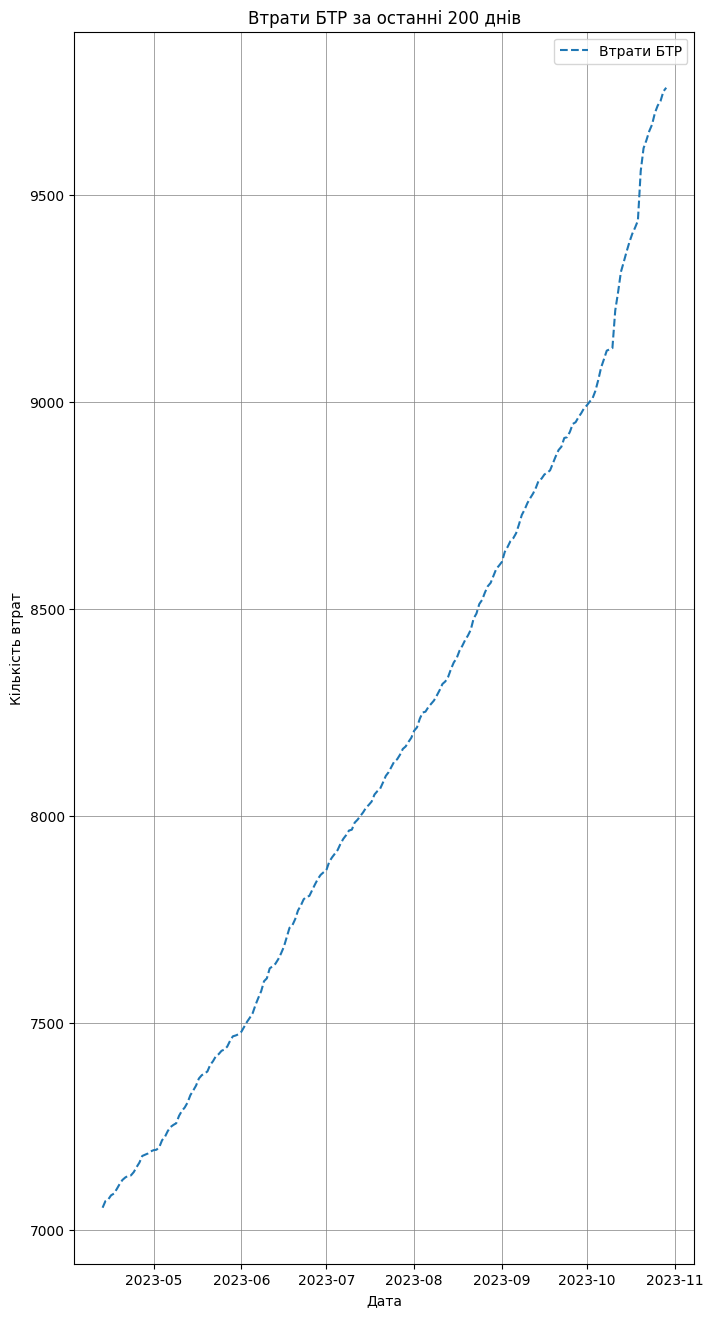

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 16), dpi=100)
plt.plot(dates[-200:], apc_values[-200:], linestyle='--')
plt.title('Втрати БТР за останні 200 днів')
plt.xlabel('Дата')
plt.ylabel('Кількість втрат')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend(['Втрати БТР'])
plt.savefig('btr_losses.png')

[GitHub](https://github.com/kolodakart/1python)